# Sprint Seq2Seq

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/'My Drive'/Sprint24

/content/drive/My Drive/Sprint24


## 1.このSprintについて

### Sprintの目的
- 系列データに関する応用例を学ぶ

### どのように学ぶか
公開されているコードを元に学んでいきます。

## 2.機械翻訳

系列データに関する手法の基本的な活用例としては機械翻訳があります。これは系列データを入力し、系列データを出力する **Sequence to Sequence** の手法によって行えます。

### 【問題1】機械翻訳の実行とコードリーディング

Keras公式のサンプルコードで、短い英語からフランス語への変換を行うものが公開されています。これを動かしてください。

[keras/lstm_seq2seq.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/lstm_seq2seq.py)

その上でこのサンプルコードの各部分がどういった役割かを読み取り、まとめてください。以下のようにどこからどこの行が何をしているかを記述してください。

（例）

- 51から55行目 : ライブラリのimport
- 57から62行目 : ハイパーパラメータの設定

**《文字単位のトークン化》**

この実装ではテキストのベクトル化の際に、単語ではなく文字ごとを1つのトークンとして扱っています。

scikit-learnでBoWを計算するCountVectorizerの場合では、デフォルトの引数`はanalyzer=’word’`で単語を扱いますが、`char`や`char_wb`とすることで文字を扱えるようになります。

`char`と`char_wb`の2種類の方法があり、`char_wb`を指定した場合、n_gramが単語内からのみ作成されます。逆に`char`は単語の区切りが関係なくn_gramが作成されます。`This movie is very good.`というテキストを3-gramでカウントする時、`char`では`s m`や`e i`といった単語をまたぐ数え方もしますが、`char_wb`ではこれらを見ません。

[sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

#### keras/lstm_seq2seq.pyの実行

In [ ]:
# !mkdir run_program

In [ ]:
# !cp ../Sprint23/examples/lstm_seq2seq.py ./run_program

In [ ]:
# # https://qiita.com/jesus_isao/items/ffa63778e7d3952537db
# !pip install download
# from download import download
# url = 'http://www.manythings.org/anki/fra-eng.zip'
# download(url, './run_program/fra-eng.zip') # urlと保存先のパス、ファイル名


file_sizes: 100%|██████████████████████████| 6.07M/6.07M [00:00<00:00, 20.3MB/s]
Successfully downloaded file to ./run_program/fra-eng.zip


'./run_program/fra-eng.zip'

In [ ]:
# !unzip ./run_program/fra-eng.zip -d ./run_program/fra-eng

Archive:  ./run_program/fra-eng.zip
  inflating: ./run_program/fra-eng/_about.txt  
  inflating: ./run_program/fra-eng/fra.txt  


In [ ]:
# pathの記載を諸々修正
# 最後の100の翻訳実行をランダムで30実行するように変更
!python run_program/lstm_seq2seq.py

2020-10-09 02:06:26.180591: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Y 2.0 (France) Attribution: tatoeba.org #785393 (CM) & #5560066 (nimfeo)', 'My sister is so annoying.\tMa sœur est tellement pénible !\tCC-BY 2.0 (France) Attribution: tatoeba.org #2221121 (Hybrid) & #2221645 (sacredceltic)', 'My sister is so annoying.\tMa sœur est tellement embêtante !\tCC-BY 2.0 (France) Attribution: tatoeba.org #2221121 (Hybrid) & #2221647 (sacredceltic)', 'My sister likes painting.\tMa sœur aime peindre.\tCC-BY 2.0 (France) Attribution: tatoeba.org #6622811 (CarpeLanam) & #6624250 (GB3)', 'My sister started crying.\tMa sœur se mit à pleurer.\tCC-BY 2.0 (France) Attribution: tatoeba.org #2133840 (Hybrid) & #3587010 (sacredceltic)', 'My son has a black beard.\tMon fils a la barbe noire.\tCC-BY 2.0 (France) Attribution: tatoeba.org #3258170 (CM) & #3258169 (Aiji)', 'My son is taller than me.\tMon fils est plus grand que moi.\tCC-BY 2.0 (France) Attribution: tatoeba.org #65534 (CK) & #817421 (sacredceltic)', "My teacher drove me home.\tMon professeur m'a reconduit chez

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




178010
Number of samples: 10000
Number of unique input tokens: 71
Number of unique output tokens: 93
Max sequence length for inputs: 15
Max sequence length for outputs: 59
2020-10-09 02:06:30.824211: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-09 02:06:30.850471: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-09 02:06:30.851102: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 836.37GiB/s
2020-10-09 02:06:30.851161: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-09 02:06:30.852769: I tens

#### keras/lstm_seq2seq.pyのコードリーディング
- 51から55行目
  - ライブラリのimport
- 57から62行目
  - ハイパーパラメータの設定
- 70から84行目
  - テキストファイルを1行ずつ読み込み
  - input_text(English), target_text(French)に分割（sentenceを抽出）して、input_texts, target_texts(リスト)へ格納
  - それぞれのtext(sentence)を文字単位に分割し、input_characters, target_characters（集合）に加える
- 86から97行目
  - 読み込んだ文字の種類数をカウント(num_..._tokens)、読み込んだtext(sentence)の長さ（単語数）の最大値を求める(max_..._seq_length)
- 99から102行目
  - アルファベット順に並び替えた文字と順序を記録した辞書を作成
  - ex {a:0, b:1, c:2,,,}
- 104から112行目
  - それぞれベクトルを記録する0の配列を作成
    - shape(text(sentence)数, textの長さの最大値, 文字の種類数)
  - encoder_input_data : input_text(English)のベクトルデータ
  - decoder_input_data : target_text(French)のベクトルデータ
  - decoder_target_data : target_text(French)の1つ先の文字のベクトルデータ
- 114から126行目
  - ベクトルの初期値を設定
    - それぞれの出現した文字毎に1を記録
- 127から147行目
  - encorder, decorderを定義してmodelを作成
  - encorderでは、LSTMのreturn_stateをTrueに設定し、3つの出力を得る
    - encoder_outputs : 出力（このモデルでは使わない）
    - state_h : 短期記憶（隠れ層の最後の出力）
    - state_c : 長期記憶（cellの最後の内部状態）
    [参考 Keras , LSTM：return_sequencesとreturn_stateの違い](https://qiita.com/satelli/items/0f4810b698b6cebcbf93)
  - decoderでは、initial_stateでencorderで出力された、state_h, state_cを設定して出力を求めている
  - decoderの最終層はtokenの数を出力する全結合層を通して、softmaxで確率を出力している
- 149から157行目
  - modelをcomplieして学習
- 168から１８６行目
  - 予測モデルを作成し、予測された予測値からtextへ戻す処理を記述（考え方はモデル作成までの処理と同じ）
- 189行目以降
  - 予測するための処理と実際の予測、テキストへの変換処理を記述

## 3.イメージキャプショニング

他の活用例としてイメージキャプショニングがあります。画像に対する説明の文章を推定するタスクです。これは画像を入力し、系列データを出力する **Image to Sequence** の手法によって行えます。

[pytorch-tutorial/tutorials/03-advanced/image_captioning at master · yunjey/pytorch-tutorial](https://github.com/yunjey/pytorch-tutorial/tree/master/tutorials/03-advanced/image_captioning)

イメージキャプショニングは学習に多くの時間がかかるため、ここでは学習済みの重みが公開されている実装を動かすことにします。Kerasには平易に扱える実装が公開されていないため、今回はPyTorchによる実装を扱います。

In [ ]:
!git clone https://github.com/pdollar/coco.git

Cloning into 'coco'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 2.57 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
%cd coco

/content/drive/My Drive/Sprint24/coco


In [ ]:
# !apt-get install tree
!tree

.
├── common
│   ├── gason.cpp
│   ├── gason.h
│   ├── maskApi.c
│   └── maskApi.h
├── license.txt
├── LuaAPI
│   ├── CocoApi.lua
│   ├── cocoDemo.lua
│   ├── env.lua
│   ├── init.lua
│   ├── MaskApi.lua
│   └── rocks
│       └── coco-scm-1.rockspec
├── MatlabAPI
│   ├── CocoApi.m
│   ├── cocoDemo.m
│   ├── CocoEval.m
│   ├── CocoUtils.m
│   ├── evalDemo.m
│   ├── gason.m
│   ├── MaskApi.m
│   └── private
│       ├── gasonMex.cpp
│       ├── gasonMex.mexa64
│       ├── gasonMex.mexmaci64
│       ├── getPrmDflt.m
│       └── maskApiMex.c
├── PythonAPI
│   ├── Makefile
│   ├── pycocoDemo.ipynb
│   ├── pycocoEvalDemo.ipynb
│   ├── pycocotools
│   │   ├── cocoeval.py
│   │   ├── coco.py
│   │   ├── __init__.py
│   │   ├── mask.py
│   │   └── _mask.pyx
│   └── setup.py
├── README.txt
└── results
    ├── captions_val2014_fakecap_results.json
    ├── instances_val2014_fakebbox100_results.json
    ├── instances_val2014_fakesegm100_results.json
    ├── person_keypoints_val2014_fakekeypoints100_

### 【問題2】イメージキャプショニングの学習済みモデルの実行
上記実装において **5. Test the model** の項目を実行してください。また、自身で用意した画像に対しても文章を生成してください。これらに対してどういった文章が出力されたかを記録して提出してください。

データセットからの学習は行わず、学習済みの重みをダウンロードして利用します。

注意点として、デフォルトで設定されている重みのファイル名と、ダウンロードできる重みのファイル名は異なっています。ここは書き換える必要があります。

In [ ]:
%cd PythonAPI/

/content/drive/My Drive/Sprint24/coco/PythonAPI


In [ ]:
!python setup.py build

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.6
creating build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/__init__.py -> build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/coco.py -> build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/cocoeval.py -> build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/mask.py -> build/lib.linux-x86_64-3.6/pycocotools
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/drive/My Drive/Sprint24/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrap

In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating pycocotools.egg-info
writing pycocotools.egg-info/PKG-INFO
writing dependency_links to pycocotools.egg-info/dependency_links.txt
writing requirements to pycocotools.egg-info/requires.txt
writing top-level names to pycocotools.egg-info/top_level.txt
writing manifest file 'pycocotools.egg-info/SOURCES.txt'
writing manifest file 'pycocotools.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.6/pycocotools/__init__.py -> build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.6/pycocotools/coco.py -> build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.6/pycocotools/cocoeval.py -> build/bdist.linux-x

In [ ]:
%cd ../../

/content/drive/My Drive/Sprint24


In [ ]:
!git clone https://github.com/yunjey/pytorch-tutorial.git

Cloning into 'pytorch-tutorial'...
remote: Enumerating objects: 917, done.
remote: Total 917 (delta 0), reused 0 (delta 0), pack-reused 917
Receiving objects: 100% (917/917), 12.80 MiB | 11.52 MiB/s, done.
Resolving deltas: 100% (491/491), done.


In [ ]:
%cd pytorch-tutorial/

/content/drive/My Drive/Sprint24/pytorch-tutorial


In [ ]:
!tree

.
├── LICENSE
├── logo
│   ├── pytorch_logo_2018.svg
│   └── pytorch_logo.png
├── README.md
└── tutorials
    ├── 01-basics
    │   ├── feedforward_neural_network
    │   │   └── main.py
    │   ├── linear_regression
    │   │   └── main.py
    │   ├── logistic_regression
    │   │   └── main.py
    │   └── pytorch_basics
    │       └── main.py
    ├── 02-intermediate
    │   ├── bidirectional_recurrent_neural_network
    │   │   └── main.py
    │   ├── convolutional_neural_network
    │   │   └── main.py
    │   ├── deep_residual_network
    │   │   └── main.py
    │   ├── language_model
    │   │   ├── data
    │   │   │   └── train.txt
    │   │   ├── data_utils.py
    │   │   └── main.py
    │   └── recurrent_neural_network
    │       └── main.py
    ├── 03-advanced
    │   ├── generative_adversarial_network
    │   │   └── main.py
    │   ├── image_captioning
    │   │   ├── build_vocab.py
    │   │   ├── data_loader.py
    │   │   ├── download.sh
    │   │   ├── model.py
    │ 

In [ ]:
%cd tutorials/03-advanced/image_captioning/

/content/drive/My Drive/Sprint24/pytorch-tutorial/tutorials/03-advanced/image_captioning


In [ ]:
!pip install download
from download import download
url = 'https://www.dropbox.com/s/ne0ixz5d58ccbbz/pretrained_model.zip?dl=0'
download(url, 'pretrained_model.zip') # urlと保存先のパス、ファイル名

Successfully downloaded file to pretrained_model.zip


'pretrained_model.zip'

In [ ]:
!unzip pretrained_model.zip -d ./models/

Archive:  pretrained_model.zip
  inflating: ./models/encoder-5-3000.pkl  
  inflating: ./models/decoder-5-3000.pkl  


In [ ]:
url = 'https://www.dropbox.com/s/26adb7y9m98uisa/vocap.zip?dl=0'
download(url, 'vocap.zip') # urlと保存先のパス、ファイル名

Successfully downloaded file to vocap.zip


'vocap.zip'

In [ ]:
!unzip vocap.zip -d ./data/

Archive:  vocap.zip
  inflating: ./data/vocab.pkl        


In [ ]:
from IPython.display import Image,display_jpeg

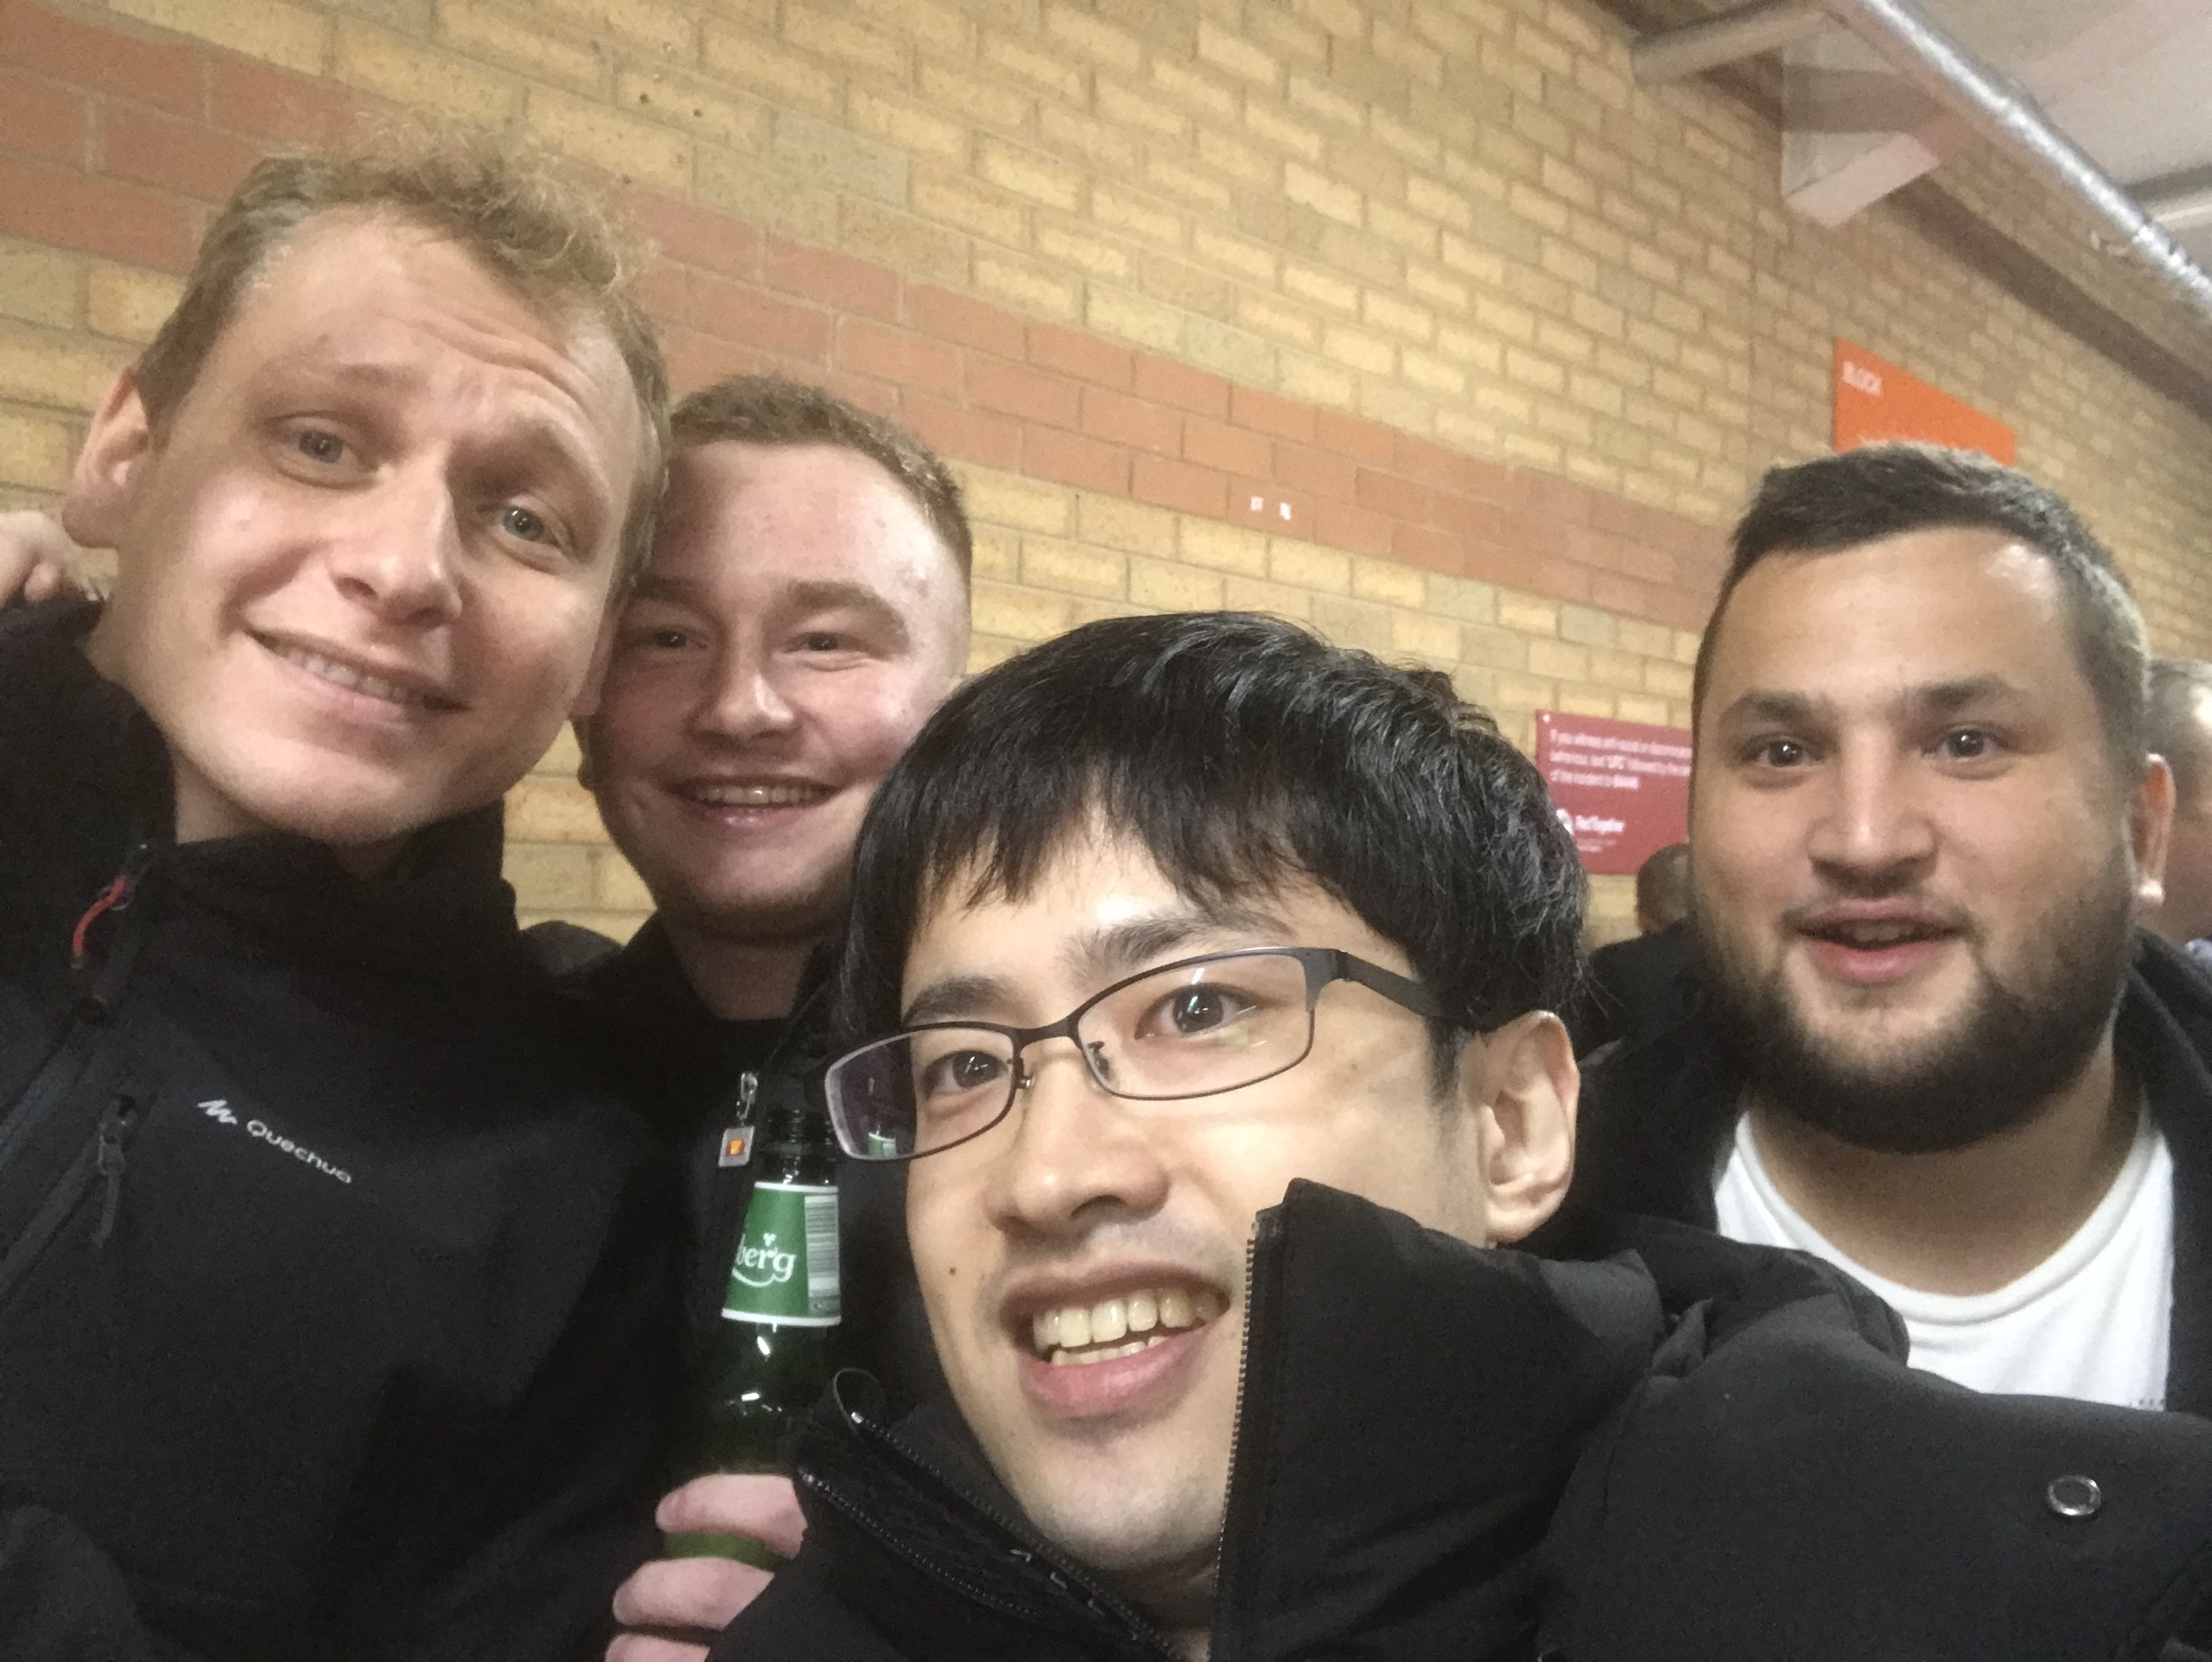

<start> a man and woman are holding a cell phone . <end>


In [ ]:
display_jpeg(Image('/content/drive/My Drive/input_image/IMG_0744.jpg', width=300, height=300))
!python sample.py --image='/content/drive/My Drive/input_image/IMG_0744.jpg'

In [ ]:
display_jpeg(Image('/content/drive/My Drive/input_image/IMG_0759.jpg', width=300, height=300))
!python sample.py --image='/content/drive/My Drive/input_image/IMG_0759.jpg'

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
display_jpeg(Image('/content/drive/My Drive/input_image/IMG_0819.jpg', width=300, height=300))
!python sample.py --image='/content/drive/My Drive/input_image/IMG_0819.jpg'

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
display_jpeg(Image('/content/drive/My Drive/input_image/IMG_0820.jpg', width=300, height=300))
!python sample.py --image='/content/drive/My Drive/input_image/IMG_0820.jpg'

Output hidden; open in https://colab.research.google.com to view.

### 【問題3】Kerasで動かしたい場合はどうするかを調査
PyTorchによる実装を動かしましたが、何らかの理由からKerasで動かしたい状況が考えられます。どういった手順を踏むことになるか調査し、できるだけ詳しく説明してください。

特に今回はPyTorchのための学習済みの重みをKerasで使えるようにしたいので、その点については必ず触れてください。

以下のような、深層学習モデルの相互変換ツールがある

- [Open Neural Network Exchange（ONNX）](https://github.com/onnx/tutorials)
- [MMdnn](https://github.com/Microsoft/MMdnn)

ONNXのチュートリアルでPytorch → ONNX → Tensorflowの例があるので、実際に動きを確認
　- [Convert a PyTorch model to Tensorflow using ONNX](https://github.com/onnx/tutorials/blob/master/tutorials/PytorchTensorflowMnist.ipynb)
- [実際動かしてみたファイル]() 予測は正しく行えている模様

ONNXを使えば、Tensorflowに変換してKerasを使えるようになると思われる
Pytorchの学習済の重みを使えるようにするためには、学習済の重みをPytorchのモデルに渡した状態でモデルを保存し、ONNXへ変換する必要がある

- sample.py　にmodelのparametersをloadした後に保存するコードを追記
```
    # Load the trained model parameters
    encoder.load_state_dict(torch.load(args.encoder_path))
    decoder.load_state_dict(torch.load(args.decoder_path))

    # save_model encorderとdecorderを保存するため分岐を作成
    if args.save_model == True:
      os.makedirs('save_models', exist_ok=True)
      torch.save(encoder.state_dict(), './save_models/torch_encoder.pth')
      torch.save(decoder.state_dict(), './save_models/torch_decoder.pth')
      print('That saving of models has completed!!')
```

In [ ]:
# 適当なイメージを入れて、saveするフラグを引数に取れるようにしてモデルを保存
!python sample.py --image='/content/drive/My Drive/input_image/IMG_0819.jpg' --save_model=True

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth
100% 230M/230M [00:02<00:00, 97.8MB/s]
That saving of models has completed!!


- encoderとdecoderをonnxへ変換

In [ ]:
from model import EncoderCNN, DecoderRNN
import torch
from torch.autograd import Variable

# Load the trained model from file
trained_encoder = EncoderCNN(embed_size=256)
trained_encoder.load_state_dict(torch.load('./save_models/torch_encoder.pth'))
# Export the trained model to ONNX   
dummy_input = Variable(torch.randn(128, 3, 224, 224)) # PIL : h224, w:224, c:3 Pytorch : c:3, h:224, w:224
# images: a tensor of shape (batch_size, 3, 224, 224)
torch.onnx.export(trained_encoder, dummy_input, "./save_models/onnx_encoder.onnx")

In [ ]:
# Load the trained model from file
trained_decoder = DecoderRNN(embed_size=256, hidden_size=512, vocab_size=9956, num_layers=1, max_seq_length=20)
trained_decoder.load_state_dict(torch.load('./save_models/torch_decoder.pth'))
# Export the trained model to ONNX

dummy_features = Variable(torch.randn(128, 256))
# captions: a tensor of shape (batch_size, padded_length).
# 9956
dummy_captions = Variable(torch.randint(0, 9956, (128, 9956)))
# lengths: a list indicating valid length for each caption. length is (batch_size).
dummy_lengths, _ = torch.sort(torch.randint(10, 100, (128, )), descending=True)
dummy_lengths = Variable(dummy_lengths)

torch.onnx.export(trained_decoder, (dummy_features, dummy_captions, dummy_lengths), "./save_models/onnx_decoder.onnx")

/usr/local/lib/python3.6/dist-packages/torch/onnx/symbolic_opset9.py:1668: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  "or define the initial states (h0/c0) as inputs of the model. ")


RuntimeError: ignored

- encoderは、onnxへ変換できた
- decoderは、inputの形式がいまいち分からず、それが原因でうまく動いていない様子
  - 元データをロードするのにも時間がかかるのでこれで検証は終了する

### 【問題4】（アドバンス課題）コードリーディングと書き換え
モデル部分はmodel.pyに書かれていますが、Kerasではこのモデルがどのように記述できるかを考え、コーディングしてください。その際機械翻訳のサンプルコードが参考になります。

#### 学習済の重み（それぞれのpickleファイル）を確認

##### vocab.pkl

In [ ]:
from build_vocab import Vocabulary
import pickle
with open('./data/vocab.pkl', 'rb') as f:
  vocab = pickle.load(f)
type(vocab)

build_vocab.Vocabulary

In [ ]:
vocab.__dict__.keys()

dict_keys(['idx2word', 'word2idx', 'idx'])

In [ ]:
vocab.__dict__['idx']

9956

In [ ]:
print(len(vocab.__dict__['idx2word']))
list(vocab.__dict__['idx2word'].items())[:10]

9956


[(0, '<pad>'),
 (1, '<start>'),
 (2, '<end>'),
 (3, '<unk>'),
 (4, 'woods'),
 (5, 'hanging'),
 (6, 'woody'),
 (7, 'comically'),
 (8, 'canes'),
 (9, 'bringing')]

In [ ]:
print(len(vocab.__dict__['word2idx']))
list(vocab.__dict__['word2idx'].items())[:10]

9956


[('raining', 4972),
 ('writings', 2433),
 ('both', 8446),
 ('yellow', 2435),
 ('four', 4974),
 ('neckties', 4208),
 ('woods', 4),
 ('hanging', 5),
 ('woody', 6),
 ('comically', 7)]

- 9956の単語が収録されており、それぞれするが割振られindex→wordとword→indexの辞書が保存されている

##### encoder-5-3000.pkl

In [ ]:
import torch
encoder = torch.load('models/encoder-5-3000.pkl')
type(encoder)

collections.OrderedDict

In [ ]:
print(len(encoder))

781


In [ ]:
# 前後10件のkeyの名前とvalueのtypeを出力
for i, (key, value) in enumerate(encoder.items()):
  if i < 10 or i > 771:
    print('key : {}, value_type : {}'.format(key, type(value)))
  elif i == 10:
    print()

key : resnet.0.weight, value_type : <class 'torch.Tensor'>
key : resnet.1.weight, value_type : <class 'torch.Tensor'>
key : resnet.1.bias, value_type : <class 'torch.Tensor'>
key : resnet.1.running_mean, value_type : <class 'torch.Tensor'>
key : resnet.1.running_var, value_type : <class 'torch.Tensor'>
key : resnet.4.0.conv1.weight, value_type : <class 'torch.Tensor'>
key : resnet.4.0.bn1.weight, value_type : <class 'torch.Tensor'>
key : resnet.4.0.bn1.bias, value_type : <class 'torch.Tensor'>
key : resnet.4.0.bn1.running_mean, value_type : <class 'torch.Tensor'>
key : resnet.4.0.bn1.running_var, value_type : <class 'torch.Tensor'>

key : resnet.7.2.bn3.bias, value_type : <class 'torch.Tensor'>
key : resnet.7.2.bn3.running_mean, value_type : <class 'torch.Tensor'>
key : resnet.7.2.bn3.running_var, value_type : <class 'torch.Tensor'>
key : linear.weight, value_type : <class 'torch.Tensor'>
key : linear.bias, value_type : <class 'torch.Tensor'>
key : bn.weight, value_type : <class 'torch

In [ ]:
# 前後10件のkeyの名前とvalueのtorch.Tensorのパラメーター確認
for i, (key, value) in enumerate(encoder.items()):
  if i < 10 or i > 771:
    print('key : {}'.format(key))
    print('shape : {}'.format(value.data.shape))
    print('dtype : {}'.format(value.dtype))
    print('device : {}'.format(value.device))
    print('requires_grad : {}'.format(value.requires_grad))
    print()
  elif i == 10:
    print()

key : resnet.0.weight
shape : torch.Size([64, 3, 7, 7])
dtype : torch.float32
device : cpu
requires_grad : False

key : resnet.1.weight
shape : torch.Size([64])
dtype : torch.float32
device : cpu
requires_grad : False

key : resnet.1.bias
shape : torch.Size([64])
dtype : torch.float32
device : cpu
requires_grad : False

key : resnet.1.running_mean
shape : torch.Size([64])
dtype : torch.float32
device : cpu
requires_grad : False

key : resnet.1.running_var
shape : torch.Size([64])
dtype : torch.float32
device : cpu
requires_grad : False

key : resnet.4.0.conv1.weight
shape : torch.Size([64, 64, 1, 1])
dtype : torch.float32
device : cpu
requires_grad : False

key : resnet.4.0.bn1.weight
shape : torch.Size([64])
dtype : torch.float32
device : cpu
requires_grad : False

key : resnet.4.0.bn1.bias
shape : torch.Size([64])
dtype : torch.float32
device : cpu
requires_grad : False

key : resnet.4.0.bn1.running_mean
shape : torch.Size([64])
dtype : torch.float32
device : cpu
requires_grad : Fals

- 781の重みが保存されており、値はTensor型で保存されている

##### decoder-5-3000.pkl

In [ ]:
decoder = torch.load('models/decoder-5-3000.pkl')
type(decoder)

collections.OrderedDict

In [ ]:
print(len(decoder))

7


In [ ]:
# keyの名前とvalueのtypeを出力
for key, value in decoder.items():
  print('key : {}, value_type : {}'.format(key, type(value)))

key : embed.weight, value_type : <class 'torch.Tensor'>
key : lstm.weight_ih_l0, value_type : <class 'torch.Tensor'>
key : lstm.weight_hh_l0, value_type : <class 'torch.Tensor'>
key : lstm.bias_ih_l0, value_type : <class 'torch.Tensor'>
key : lstm.bias_hh_l0, value_type : <class 'torch.Tensor'>
key : linear.weight, value_type : <class 'torch.Tensor'>
key : linear.bias, value_type : <class 'torch.Tensor'>


In [ ]:
# keyの名前とvalueのtorch.Tensorのパラメーター確認
for key, value in decoder.items():
  print('key : {}'.format(key))
  print('shape : {}'.format(value.data.shape))
  print('dtype : {}'.format(value.dtype))
  print('device : {}'.format(value.device))
  print('requires_grad : {}'.format(value.requires_grad))
  print()

key : embed.weight
shape : torch.Size([9956, 256])
dtype : torch.float32
device : cpu
requires_grad : False

key : lstm.weight_ih_l0
shape : torch.Size([2048, 256])
dtype : torch.float32
device : cpu
requires_grad : False

key : lstm.weight_hh_l0
shape : torch.Size([2048, 512])
dtype : torch.float32
device : cpu
requires_grad : False

key : lstm.bias_ih_l0
shape : torch.Size([2048])
dtype : torch.float32
device : cpu
requires_grad : False

key : lstm.bias_hh_l0
shape : torch.Size([2048])
dtype : torch.float32
device : cpu
requires_grad : False

key : linear.weight
shape : torch.Size([9956, 512])
dtype : torch.float32
device : cpu
requires_grad : False

key : linear.bias
shape : torch.Size([9956])
dtype : torch.float32
device : cpu
requires_grad : False



- 7の重みが保存されており、値はTensor型で保存されている

#### Pytorchで書かれたprogramをコピーして、Kerasへ書き換え

In [ ]:
%cd /content/drive/My Drive/Sprint24

/content/drive/My Drive/Sprint24


In [ ]:
!mkdir image_captioning_in_keras

In [ ]:
%cd image_captioning_in_keras

/content/drive/My Drive/Sprint24/image_captioning_in_keras


In [ ]:
!mkdir pytorch_ver

In [ ]:
# pytorchの重みをコピー
!cp /content/drive/'My Drive'/Sprint24/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/vocab.pkl ./pytorch_ver/
!cp /content/drive/'My Drive'/Sprint24/pytorch-tutorial/tutorials/03-advanced/image_captioning/models/encoder-5-3000.pkl ./pytorch_ver/
!cp /content/drive/'My Drive'/Sprint24/pytorch-tutorial/tutorials/03-advanced/image_captioning/models/decoder-5-3000.pkl ./pytorch_ver/

In [ ]:
# pytorchのmodel.py, sample.pyをコピー
!cp /content/drive/'My Drive'/Sprint24/pytorch-tutorial/tutorials/03-advanced/image_captioning/model.py ./model_keras.py
!cp /content/drive/'My Drive'/Sprint24/pytorch-tutorial/tutorials/03-advanced/image_captioning/sample.py ./sample_keras.py

In [ ]:
# コーディングするファイルを作成
!touch image_captioning_keras.py

In [ ]:
!python image_captioning_keras.py